In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

import xgboost

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense

C:\Python27\envs\py36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('dataset_modelling.csv')

In [11]:
df1 = df.dropna(subset=['noc'])

In [12]:
df1['mse'] = (df1['noc']-3)**2
df1['mse'].mean()

C:\Python27\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.42586226818418166

In [13]:
df1[df1['noc']==3]

,employee_id,manager_id,year,obj,noc,age_range,fn_class,bus_supp,business,support,unknown,fn_area,fn_area_code,area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area13,area14,area15,area16,area17,area18,area19,job_id,length_service,seniority_fn,seniority_job_mnths,white_collar,fn_junior,fn_middle,fn_senior,obj_noc,prev_obj,prev_obj2,prev_obj3,next_obj,prev_noc,prev_noc2,prev_noc3,next_noc,change_manager,change_fn_class,change_fn_area,change_bus_supp,change_job,next_change_fn_class,fn_class_years,obj_bad_years,obj_avg_years,obj_good_years,noc_bad_years,noc_avg_years,noc_good_years,is_manager,num_emp_managing,obj_emp_managing,noc_emp_managing,prev_obj_emp_managing,prev_noc_emp_managing,manager_fn_class,manager_prev_obj,manager_prev_noc,gdp_growth_beg,gdp_growth_mid,stock_return_beg,stock_return_mid,roe,num_emp,avg_wage,medical_accident,lost_time_accident,emp_satisfaction,glassdoor,mse
0,000011c8277ab49f32fb06947bf24fd3,42366ce69599ffac65edf2b3830efbc1,2015,3.0,3.0,3.0,NaN,Business,1,0,0,RESEARCH & INNOVATION,area17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,873b39b0ccf0a99fdd86f34311a04cca,0.0,NaN,1.098612,0,0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,16.0,3.324194,3.000000,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833,0.0
9,00011f93714426cccdcc957aacdfc544,a488e77e3fc340ebc1050c7f5c46db6f,2010,3.0,3.0,4.0,16.0,Support,0,1,0,SUPPORT,area19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,f693654453e420536492f06eac3513fd,29.0,3.871201,4.682131,1,1,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,18.0,3.324194,3.447584,0.7,2.2,0.245322,0.076294,11.10,28204,71479.22281,5.10,1.60,0.77,3.857,0.0
50,000e2cce117c2e7fb4e5ebe5d31aefae,50c9eec4bb37c7ea7ee70f49d1d8977e,2015,4.0,3.0,3.0,18.0,Support,0,1,0,INFORMATION & KNOWLEDGE,area8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,76ea126f52ae50874af76bb9c23efafa,7.0,3.367296,3.044522,1,1,0,0,3.5,4.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,0,0,0,0,0,NaN,3,0.0,0.0,2.0,0.0,0.0,2.0,0,0.000000,NaN,NaN,3.190502,3.126297,21.0,4.000000,3.000000,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833,0.0
71,0011fa5408daf71cc6c6bdfa9ed3794d,c41f286f262856fc743b0e57a7b28ba1,2014,3.0,3.0,3.0,NaN,Support,0,1,0,SUPPLY CHAIN,area18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21f0a69796457e3666ded0a158edfd97,4.0,NaN,3.912023,0,0,0,0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,1,0,0,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,19.0,3.000000,3.000000,1.1,0.4,0.252949,0.093402,4.23,27146,78943.49075,1.06,0.80,0.72,3.667,0.0
72,0011fa5408daf71cc6c6bdfa9ed3794d,9513c2caee69ce2f9297eee03b678795,2015,3.0,3.0,3.0,NaN,Support,0,1,0,SUPPLY CHAIN,area18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21f0a69796457e3666ded0a158edfd97,5.0,NaN,4.127134,0,0,0,0,3.0,3.0,NaN,NaN,3.0,3.0,NaN,NaN,3.0,1,0,0,0,0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,15.0,3.000000,4.000000,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833,0.0
73,0011fa5408daf71cc6c6bdfa9ed3794d,9513c2caee69ce2f9297eee03b678795,2016,3.0,3.0,3.0,NaN,Support,0,1,0,SUPPLY CHAIN,area18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21f0a69796457e3666ded0a158edfd97,6.0,NaN,4.304065,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,NaN,3.0,0,0,0,0,0,0.0,0,0.0,2.0,0.0,0.0,2.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,15.0,3.000000,3.000000,1.5,2.4,-0.075295,-0.235294,4.82,26350,77457.30550,0.77,0.75,0.77,3.703,0.0
74,0011fa5408daf71cc6c6bdfa9ed3794d,9513c2caee69ce2f9297eee03b678795,2017,3.0,3.0,4.0,NaN,Support,0,1,0,SUPPLY CHAIN,area18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21f0a69796457e3666ded0a158edfd97,7.0,NaN,4.454347,0,0,0,0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,NaN,0,0,0,0,0,NaN,0,0.0,3.0,0.0,0.0,3.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,15.0,3.000000,3.000000,1.9,1.6,-0.155287,0.315495,6.39,27030,89974.10285,0.77,0.76,0.75,3.798,0.0
85,0017e035a65c31f5aa2a60a3ba72e5bc,d65

In [5]:
df

,employee_id,manager_id,year,obj,noc,age_range,fn_class,bus_supp,business,support,unknown,fn_area,fn_area_code,area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area13,area14,area15,area16,area17,area18,area19,job_id,length_service,seniority_fn,seniority_job_mnths,white_collar,fn_junior,fn_middle,fn_senior,obj_noc,prev_obj,prev_obj2,prev_obj3,next_obj,prev_noc,prev_noc2,prev_noc3,next_noc,change_manager,change_fn_class,change_fn_area,change_bus_supp,change_job,next_change_fn_class,fn_class_years,obj_bad_years,obj_avg_years,obj_good_years,noc_bad_years,noc_avg_years,noc_good_years,is_manager,num_emp_managing,obj_emp_managing,noc_emp_managing,prev_obj_emp_managing,prev_noc_emp_managing,manager_fn_class,manager_prev_obj,manager_prev_noc,gdp_growth_beg,gdp_growth_mid,stock_return_beg,stock_return_mid,roe,num_emp,avg_wage,medical_accident,lost_time_accident,emp_satisfaction,glassdoor
0,000011c8277ab49f32fb06947bf24fd3,42366ce69599ffac65edf2b3830efbc1,2015,3.0,3.0,3.0,NaN,Business,1,0,0,RESEARCH & INNOVATION,area17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,873b39b0ccf0a99fdd86f34311a04cca,0.0,NaN,1.098612,0,0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,NaN,NaN,3.190502,3.126297,16.000000,3.324194,3.000000,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833
1,0000bc10fd609031c8355e93ac23213b,NaN,2010,NaN,NaN,3.0,NaN,Unknown,0,0,1,Not assigned,area13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,be56b1a06b8ca176c8da6514bfcb1054,12.0,NaN,0.000000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,0.7,2.2,0.245322,0.076294,11.10,28204,71479.22281,5.10,1.60,0.77,3.857
2,0000bc10fd609031c8355e93ac23213b,NaN,2011,NaN,NaN,3.0,NaN,Unknown,0,0,1,Not assigned,area13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,be56b1a06b8ca176c8da6514bfcb1054,13.0,NaN,2.564949,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,2.6,1.9,0.249583,0.357248,26.70,16785,79773.60739,4.80,1.60,0.77,3.750
3,0000bc10fd609031c8355e93ac23213b,NaN,2012,NaN,NaN,3.0,NaN,Unknown,0,0,1,Not assigned,area13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,be56b1a06b8ca176c8da6514bfcb1054,14.0,NaN,3.218876,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,1.7,1.9,0.156313,-0.159330,4.30,29121,48830.74070,2.90,0.80,0.77,3.750
4,0000bc10fd609031c8355e93ac23213b,NaN,2013,NaN,NaN,3.0,NaN,Business,1,0,0,INDUSTRIAL,area7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6deef4264a3a63d28df5ebea4cf5cc6b,15.0,NaN,1.791759,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,1.9,1.1,0.009012,0.078667,9.80,29103,79098.37474,2.59,0.81,0.72,3.750
5,0000bc10fd609031c8355e93ac23213b,NaN,2014,NaN,NaN,3.0,NaN,Business,1,0,0,INDUSTRIAL,area7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6deef4264a3a63d28df5ebea4cf5cc6b,16.0,NaN,2.890372,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,1.1,0.4,0.252949,0.093402,4.23,27146,78943.49075,1.06,0.80,0.72,3.667
6,0000bc10fd609031c8355e93ac23213b,NaN,2015,NaN,NaN,3.0,NaN,Business,1,0,0,INDUSTRIAL,area7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6deef4264a3a63d28df5ebea4cf5cc6b,17.0,NaN,3.401197,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN,3.190502,3.126297,20.594267,3.324194,3.447584,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833
7,0000bc10fd609031c8355e93ac23213b,NaN,2016,NaN,NaN,3.0,NaN,Business,1,0,0,INDUSTRIAL,area7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6b7b7a343c620ecd6ad8013c0266e2d0,18.0,NaN,2.197225,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1

## 1. Predicting obj and noc score

### 1.1 Build the models

Linear regression

In [6]:
def linreg(purpose, param):    
    model = LinearRegression().fit(X_train, y_train)
    
    if purpose == 'train':
        pred = np.round(model.predict(X_val),0)
        return (None, pred)
    if purpose == 'test':
        return (model, np.round(model.predict(X_test), 0))

Decision Tree

In [7]:
def dectree(purpose, param):
    if purpose == 'train':
        best_model = ['max_depth', 1000, 'pred']
        
        #Cross validation on the max_depth parameter
        for max_depth in range(3,10):    
            model = tree.DecisionTreeClassifier(max_depth=max_depth)
            model.fit(X_train, y_train)

            pred = model.predict(X_val)
            mse = (mean_squared_error(y_val, pred))

            if mse < best_model[1]:
                best_model[0] = max_depth
                best_model[1] = mse
                best_model[2] = pred
        return (best_model[0], best_model[2])
    if purpose == 'test':
        model = tree.DecisionTreeClassifier(max_depth=param)
        model.fit(X_train, y_train)
        
        return (model, model.predict(X_test))

Random Forest

In [8]:
def rf(purpose, param):
    if purpose == 'train':
        best_model = ['n_estimators', 1000, 'pred']

        #Cross validation on the n_estimators parameter
        for n_estimators in [25, 50, 100, 200]:    
            model = RandomForestClassifier(max_depth=3, n_estimators=n_estimators)
            model.fit(X_train, y_train)

            pred = model.predict(X_val)
            mse = (mean_squared_error(y_val, pred))

            if mse < best_model[1]:
                best_model[0] = n_estimators
                best_model[1] = mse
                best_model[2] = pred
        return (best_model[0], best_model[2])
    if purpose == 'test':
        model = RandomForestClassifier(max_depth=3, n_estimators=param)
        model.fit(X_train, y_train)
        
        return (model, model.predict(X_test))

XGBoost

In [9]:
def xgb(purpose, param):
    if purpose == 'train':
        best_model = ['learning_rate', 1000, 'pred']
        
        #Cross validation on the learning_rate parameter        
        for learning_rate in [0.05, 0.1, 0.2]:
            params = {'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':learning_rate,
                'max_depth':4, 'alpha':10}

            model = xgboost.train(params=params, dtrain=dtrain, num_boost_round=10000)

            pred = np.round(model.predict(dval),0)
            mse = (mean_squared_error(y_val, pred))

            if mse < best_model[1]:
                best_model[0] = learning_rate
                best_model[1] = mse
                best_model[2] = pred
        return (best_model[0], best_model[2])
    if purpose == 'test':
        params = {'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':param,
                'max_depth':4, 'alpha':10}

        model = xgboost.train(params=params, dtrain=dtrain, num_boost_round=10000)
        
        return (model, np.round(model.predict(dtest),0))

Neural Network

In [10]:
def nn(purpose, param):
    model = Sequential()
    
    #hidden layer contains 8 nodes
    model.add(Dense(8, input_dim=len(feature_names)))
    model.add(Activation('relu'))
    
    #Output activator is relu to ensure the output is positive 
    model.add(Dense(1))
    model.add(Activation('relu'))

    model.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mse'])
    model.fit(X_train, y_train, epochs=30, batch_size=10, verbose=0)
    
    if purpose == 'train':        
        pred = np.round(model.predict(X_val),0)
        return (None, pred)
    if purpose == 'test':
        return (model, np.round(model.predict(X_test),0))

Preparing the train, validation and test sets

In [11]:
def train_test(target, feature_names):
    data = df.dropna(subset=feature_names)
    data = data.dropna(subset=[target])
    
    #Some classification models require the data to be labeled starting from 0. 
        #The performance score is originally ranged from 1-5, hence the transformation
    data[target] = data[target]-1

    X = data[feature_names].values
    y = data[target].values.reshape(-1,1)
    
    #Create the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    #Split again to create the train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
    
    #scale the features to avoid extreme values
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    #Create DMatrix data for the XGBoost model
    dtrain = xgboost.DMatrix(X_train, label=(y_train), feature_names=feature_names)
    dval = xgboost.DMatrix(X_val, label=(y_val), feature_names=feature_names)
    dtest = xgboost.DMatrix(X_test, label=(y_test), feature_names=feature_names)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest

### 1.2 Train the models on obj

In [12]:
models = [linreg, dectree, rf, xgb, nn]

In [13]:
#The models are trained on 2 datasets. The general one contains less features and can be used for employees with limited information.
def select_features_obj():
    feature_names_general = ['age_range', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_job_mnths', 'white_collar', 
                     'change_manager', 'change_job', 'change_fn_area', 'change_bus_supp', 
                     'obj_bad_years', 'obj_avg_years', 'obj_good_years', 
                     'is_manager', 'num_emp_managing', 'manager_fn_class', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']


    feature_names_all = ['age_range', 'fn_class', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_fn', 'seniority_job_mnths', 
                     'white_collar', 'fn_junior', 'fn_middle', 'fn_senior', 
                     'prev_noc', 'prev_obj', 'prev_obj2', 'prev_obj3', 
                     'change_manager', 'change_job', 'change_fn_class', 'change_fn_area', 'change_bus_supp', 
                     'obj_bad_years', 'obj_avg_years', 'obj_good_years', 
                     'is_manager', 'num_emp_managing', 'prev_obj_emp_managing', 
                     'manager_fn_class', 'manager_prev_obj', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']

    feature_names_list = []
    feature_names_list.append(feature_names_general)
    feature_names_list.append(feature_names_all)
    return feature_names_list

For each model type, train the model on different parameters and select the parameter with best validation result

In [ ]:
cv_results_obj = []

feature_names_list = select_features_obj()

for feature_names in feature_names_list:
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names)    
    
    cv_results = []
    for model in models:
        cv_result = model('train', None)
        cv_results.append(cv_result)
    
    cv_results_obj.append(cv_results)

Display the best searched parameters

In [23]:
for i, f in enumerate(['feature_names_general:', 'feature_names_all:']):
    print(f)
    print('The best max_depth for Decision Tree is: ' + str(cv_results_obj[i][1][0]))
    print('The best n_estimators for Random Forest is: ' + str(cv_results_obj[i][2][0]))
    print('The best learning_rate for XGBoost is: ' + str(cv_results_obj[i][3][0]))
    print('')

feature_names_general:
The best max_depth for Decision Tree is: 5
The best n_estimators for Random Forest is: 25
The best learning_rate for XGBoost is: 0.05

feature_names_all:
The best max_depth for Decision Tree is: 4
The best n_estimators for Random Forest is: 50
The best learning_rate for XGBoost is: 0.05



Display the accuracy score for the best parameter for each model

In [16]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names)
    print(f)
    print('The validation accuracy score for Regression is: ' + str(accuracy_score(y_val, cv_results_obj[i][0][1])))
    print('The validation accuracy score for Decision Tree is: ' + str(accuracy_score(y_val, cv_results_obj[i][1][1])))
    print('The validation accuracy score for Random Forest is: ' + str(accuracy_score(y_val, cv_results_obj[i][2][1])))
    print('The validation accuracy score for XGBoost is: ' + str(accuracy_score(y_val, cv_results_obj[i][3][1])))
    print('The validation accuracy score for Neural Network is: ' + str(accuracy_score(y_val, cv_results_obj[i][4][1])))
    print('')

feature_names_general:
The validation accuracy score for Regression is: 0.7099019877255657
The validation accuracy score for Decision Tree is: 0.7118255931116607
The validation accuracy score for Random Forest is: 0.7030319684895118
The validation accuracy score for XGBoost is: 0.7138407987542366
The validation accuracy score for Neural Network is: 0.7137491984977558

feature_names_all:
The validation accuracy score for Regression is: 0.7374843554443054
The validation accuracy score for Decision Tree is: 0.7280976220275344
The validation accuracy score for Random Forest is: 0.7293491864831039
The validation accuracy score for XGBoost is: 0.736232790988736
The validation accuracy score for Neural Network is: 0.7287234042553191



### 1.3 Train the models on noc

In [17]:
def select_features_noc():
    feature_names_general = ['age_range', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_job_mnths', 'white_collar', 
                     'change_manager', 'change_job', 'change_fn_area', 'change_bus_supp', 
                     'noc_bad_years', 'noc_avg_years', 'noc_good_years', 
                     'is_manager', 'num_emp_managing', 'manager_fn_class', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']

    feature_names_all = ['age_range', 'fn_class', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_fn', 'seniority_job_mnths', 
                     'white_collar', 'fn_junior', 'fn_middle', 'fn_senior', 
                     'prev_obj', 'prev_noc', 'prev_noc2', 'prev_noc3', 
                     'change_manager', 'change_job', 'change_fn_class', 'change_fn_area', 'change_bus_supp', 
                     'noc_bad_years', 'noc_avg_years', 'noc_good_years', 
                     'is_manager', 'num_emp_managing', 'prev_noc_emp_managing', 
                     'manager_fn_class', 'manager_prev_noc', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']


    feature_names_list = []
    feature_names_list.append(feature_names_general)
    feature_names_list.append(feature_names_all)
    return feature_names_list

In [ ]:
cv_results_noc = []

feature_names_list = select_features_noc()

for feature_names in feature_names_list:
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names)    
    
    cv_results = []
    for model in models:
        cv_result = model('train', None)
        cv_results.append(cv_result)
    
    cv_results_noc.append(cv_results)

Display the best searched parameters

In [19]:
for i, f in enumerate(['feature_names_general:', 'feature_names_all:']):
    print(f)
    print('The best max_depth for Decision Tree is: ' + str(cv_results_noc[i][1][0]))
    print('The best n_estimators for Random Forest is: ' + str(cv_results_noc[i][2][0]))
    print('The best learning_rate for XGBoost is: ' + str(cv_results_noc[i][3][0]))
    print('')

feature_names_general:
The best max_depth for Decision Tree is: 3
The best n_estimators for Random Forest is: 100
The best learning_rate for XGBoost is: 0.05

feature_names_all:
The best max_depth for Decision Tree is: 3
The best n_estimators for Random Forest is: 200
The best learning_rate for XGBoost is: 0.2



Display the accuracy score for the best parameter for each model

In [20]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names)
    print(f)
    try:
        print('The validation accuracy score for Regression is: ' + str(accuracy_score(y_val, cv_results_noc[i][0][1])))
    except: pass
    print('The validation accuracy score for Decision Tree is: ' + str(accuracy_score(y_val, cv_results_noc[i][1][1])))
    print('The validation accuracy score for Random Forest is: ' + str(accuracy_score(y_val, cv_results_noc[i][2][1])))
    print('The validation accuracy score for XGBoost is: ' + str(accuracy_score(y_val, cv_results_noc[i][3][1])))
    print('The validation accuracy score for Neural Network is: ' + str(accuracy_score(y_val, cv_results_noc[i][4][1])))
    print('')

feature_names_general:
The validation accuracy score for Regression is: 0.6570680628272252
The validation accuracy score for Decision Tree is: 0.6714208340855751
The validation accuracy score for Random Forest is: 0.6454233616176205
The validation accuracy score for XGBoost is: 0.6774688571944394
The validation accuracy score for Neural Network is: 0.6238490702292833

feature_names_all:
The validation accuracy score for Decision Tree is: 0.7334370139968895
The validation accuracy score for Random Forest is: 0.7300155520995334
The validation accuracy score for XGBoost is: 0.7390357698289269
The validation accuracy score for Neural Network is: 0.713841368584759



### 1.4 Make prediction on the test set

#### Make prediction on obj

In [21]:
feature_names_list = select_features_obj()

In [ ]:
test_results_obj = []

for i, feature_names in enumerate(feature_names_list):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names)    
    
    test_results = []
    for j, model in enumerate(cv_results_obj[i]):
        test_result = models[j]('test', cv_results_obj[i][j][0])
        test_results.append(test_result)
        
    test_results_obj.append(test_results)

In [24]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names)
    print(f)
    print('The test accuracy score for Regression is: ' + str(accuracy_score(y_test, test_results_obj[i][0][1])))
    print('The test accuracy score for Decision Tree is: ' + str(accuracy_score(y_test, test_results_obj[i][1][1])))
    print('The test accuracy score for Random Forest is: ' + str(accuracy_score(y_test, test_results_obj[i][2][1])))
    print('The test accuracy score for XGBoost is: ' + str(accuracy_score(y_test, test_results_obj[i][3][1])))
    print('The test accuracy score for Neural Network is: ' + str(accuracy_score(y_test, test_results_obj[i][4][1])))
    print('')

feature_names_general:
The test accuracy score for Regression is: 0.7196247984757438
The test accuracy score for Decision Tree is: 0.720943866334457
The test accuracy score for Random Forest is: 0.7128828960867654
The test accuracy score for XGBoost is: 0.7249010699105966
The test accuracy score for Neural Network is: 0.7111974204895207

feature_names_all:
The test accuracy score for Regression is: 0.737171464330413
The test accuracy score for Decision Tree is: 0.7391739674593242
The test accuracy score for Random Forest is: 0.7266583229036295
The test accuracy score for XGBoost is: 0.7376720901126408
The test accuracy score for Neural Network is: 0.7229036295369211



In [25]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names)
    print(f)
    print('The test mse score for Regression is: ' + str(mean_squared_error(y_test, test_results_obj[i][0][1])))
    print('The test mse score for Decision Tree is: ' + str(mean_squared_error(y_test, test_results_obj[i][1][1])))
    print('The test mse score for Random Forest is: ' + str(mean_squared_error(y_test, test_results_obj[i][2][1])))
    print('The test mse score for XGBoost is: ' + str(mean_squared_error(y_test, test_results_obj[i][3][1])))
    print('The test mse score for Neural Network is: ' + str(mean_squared_error(y_test, test_results_obj[i][4][1])))
    print('')

feature_names_general:
The test mse score for Regression is: 0.3102740729884215
The test mse score for Decision Tree is: 0.307855781914114
The test mse score for Random Forest is: 0.32075333431042063
The test mse score for XGBoost is: 0.3008207533343104
The test mse score for Neural Network is: 0.4072988421515462

feature_names_all:
The test mse score for Regression is: 0.2785982478097622
The test mse score for Decision Tree is: 0.2788485607008761
The test mse score for Random Forest is: 0.29586983729662075
The test mse score for XGBoost is: 0.2758448060075094
The test mse score for Neural Network is: 0.3444305381727159



#### Make prediction on noc

In [26]:
feature_names_list = select_features_noc()

In [ ]:
test_results_noc = []

for i, feature_names in enumerate(feature_names_list):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names)    
    
    test_results = []
    for j, model in enumerate(cv_results_noc[i]):
        test_result = models[j]('test', cv_results_noc[i][j][0])
        test_results.append(test_result)
        
    test_results_noc.append(test_results)


In [28]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names)
    print(f)
    print('The test accuracy score for Regression is: ' + str(accuracy_score(y_test, test_results_noc[i][0][1])))
    print('The test accuracy score for Decision Tree is: ' + str(accuracy_score(y_test, test_results_noc[i][1][1])))
    print('The test accuracy score for Random Forest is: ' + str(accuracy_score(y_test, test_results_noc[i][2][1])))
    print('The test accuracy score for XGBoost is: ' + str(accuracy_score(y_test, test_results_noc[i][3][1])))
    print('The test accuracy score for Neural Network is: ' + str(accuracy_score(y_test, test_results_noc[i][4][1])))
    print('')

feature_names_general:
The test accuracy score for Regression is: 0.659950895436164
The test accuracy score for Decision Tree is: 0.6722992489890237
The test accuracy score for Random Forest is: 0.6419699595609474
The test accuracy score for XGBoost is: 0.6795205083766609
The test accuracy score for Neural Network is: 0.6694829578278452

feature_names_all:
The test accuracy score for Regression is: 0.7364360378297661
The test accuracy score for Decision Tree is: 0.7312095569935291
The test accuracy score for Random Forest is: 0.7307117969138875
The test accuracy score for XGBoost is: 0.7346938775510204
The test accuracy score for Neural Network is: 0.7282229965156795



In [29]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names)
    print(f)
    print('The test mse score for Regression is: ' + str(mean_squared_error(y_test, test_results_noc[i][0][1])))
    print('The test mse score for Decision Tree is: ' + str(mean_squared_error(y_test, test_results_noc[i][1][1])))
    print('The test mse score for Random Forest is: ' + str(mean_squared_error(y_test, test_results_noc[i][2][1])))
    print('The test mse score for XGBoost is: ' + str(mean_squared_error(y_test, test_results_noc[i][3][1])))
    print('The test mse score for Neural Network is: ' + str(mean_squared_error(y_test, test_results_noc[i][4][1])))
    print('')

feature_names_general:
The test mse score for Regression is: 0.3915366839976892
The test mse score for Decision Tree is: 0.3783939919121895
The test mse score for Random Forest is: 0.41103408434430966
The test mse score for XGBoost is: 0.36503466204506063
The test mse score for Neural Network is: 0.3848209127671866

feature_names_all:
The test mse score for Regression is: 0.29193628670980587
The test mse score for Decision Tree is: 0.3001493280238925
The test mse score for Random Forest is: 0.3081134892981583
The test mse score for XGBoost is: 0.2884519661523146
The test mse score for Neural Network is: 0.30761572921851665



### 1.5 Visualizing the models

#### Linear regression

In [30]:
from yellowbrick.regressor import ResidualsPlot

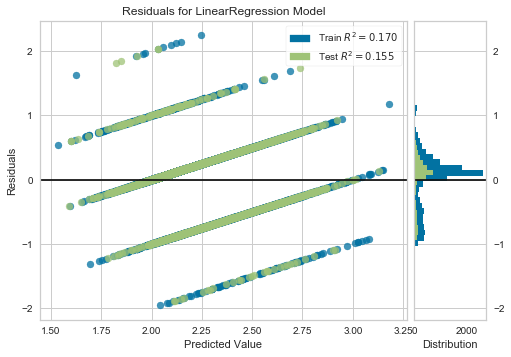

In [31]:
#Residual Plot for regression
visualizer = ResidualsPlot(test_results_obj[1][0][0])

feature_names_list = select_features_obj()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names_list[1])

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

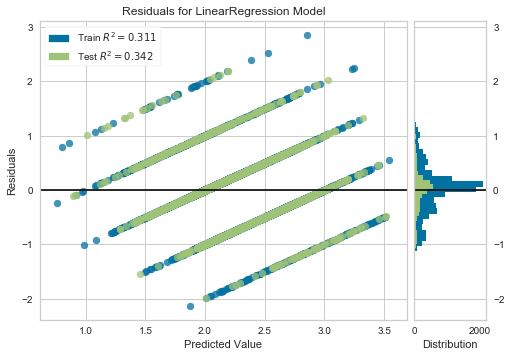

In [32]:
visualizer = ResidualsPlot(test_results_noc[1][0][0])

feature_names_list = select_features_noc()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names_list[1])

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

#### Decision Tree

In [33]:
from IPython.display import SVG
from graphviz import Source

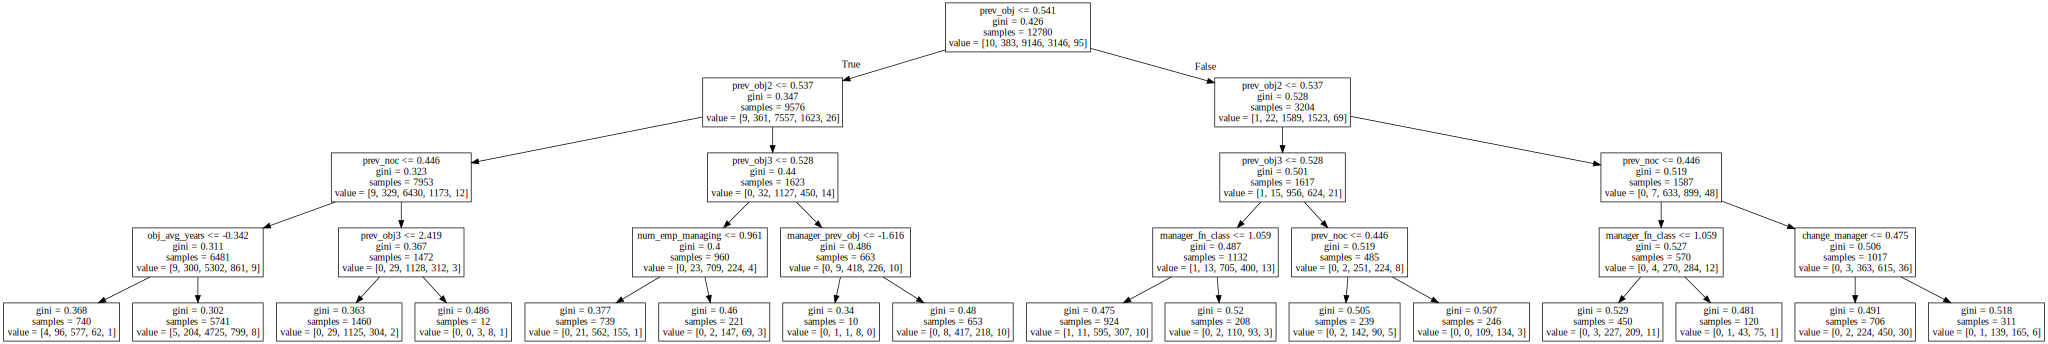

In [45]:
#The trees can be viewed in <Appendix DecisionTreeOutputs.pdf>
feature_names_list = select_features_obj()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names_list[1])

graph = Source(tree.export_graphviz(test_results_obj[1][1][0], out_file=None, feature_names=feature_names_list[1]))

SVG(graph.pipe(format='svg'))

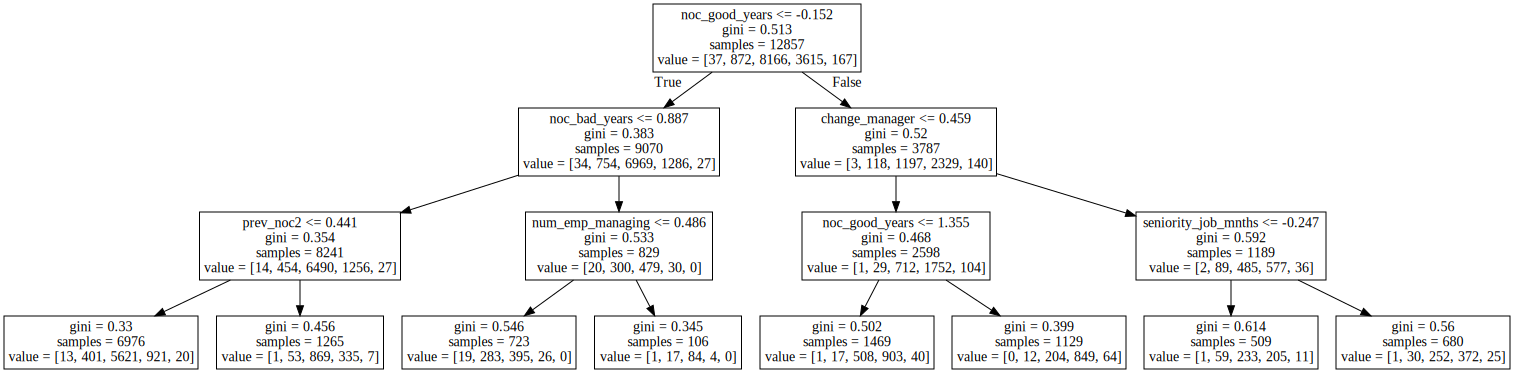

In [47]:
feature_names_list = select_features_noc()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names_list[1])

graph = Source(tree.export_graphviz(test_results_noc[1][1][0], out_file=None, feature_names=feature_names_list[1]))

SVG(graph.pipe(format='svg'))

#### Random Forest

In [38]:
import shap
#Shap is a tool to visualize feature importance for tree based models.

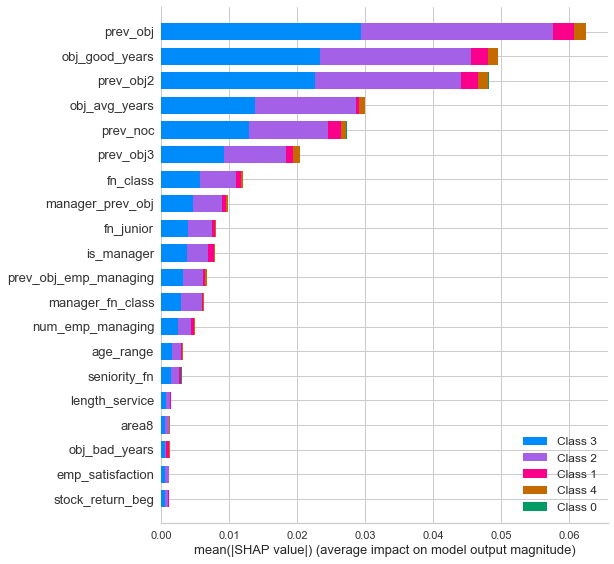

In [43]:
feature_names_list = select_features_obj()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names_list[1])

X_shap = pd.DataFrame(X_train, columns=feature_names_list[1])
shap_values = shap.TreeExplainer(test_results_obj[1][2][0]).shap_values(X_shap)

shap.summary_plot(shap_values, X_shap)

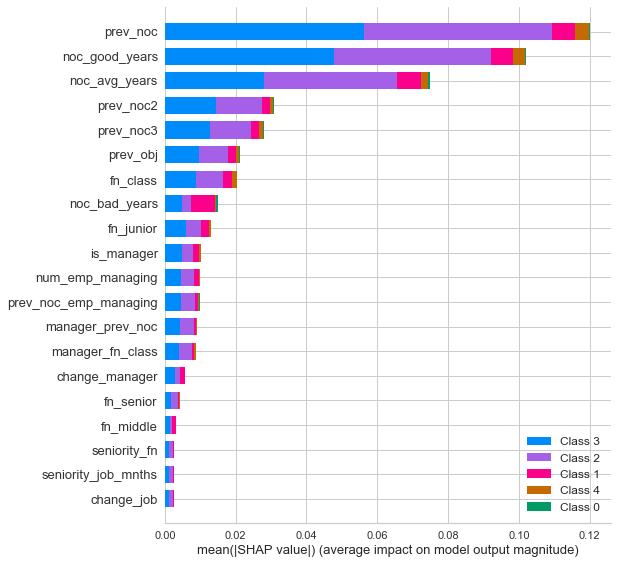

In [49]:
feature_names_list = select_features_noc()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names_list[1])

X_shap = pd.DataFrame(X_train, columns=feature_names_list[1])
shap_values = shap.TreeExplainer(test_results_noc[1][2][0]).shap_values(X_shap)

shap.summary_plot(shap_values, X_shap)

#### XGBoost

In [ ]:
#For the following shap visuals, the features are ranked by importance. Each dot on each line represents an observation
    #and shows how importance the feature is to that specific observation.

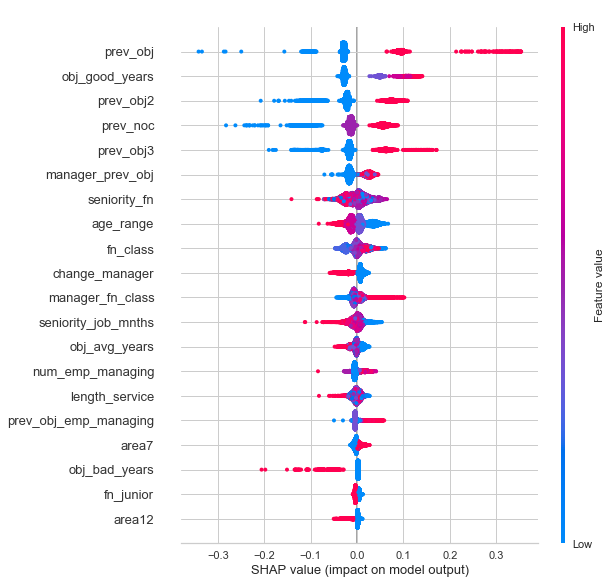

In [50]:
feature_names_list = select_features_obj()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('obj', feature_names_list[1])

X_shap = pd.DataFrame(X_train, columns=feature_names_list[1])
shap_values = shap.TreeExplainer(test_results_obj[1][3][0]).shap_values(X_shap)

shap.summary_plot(shap_values, X_shap)

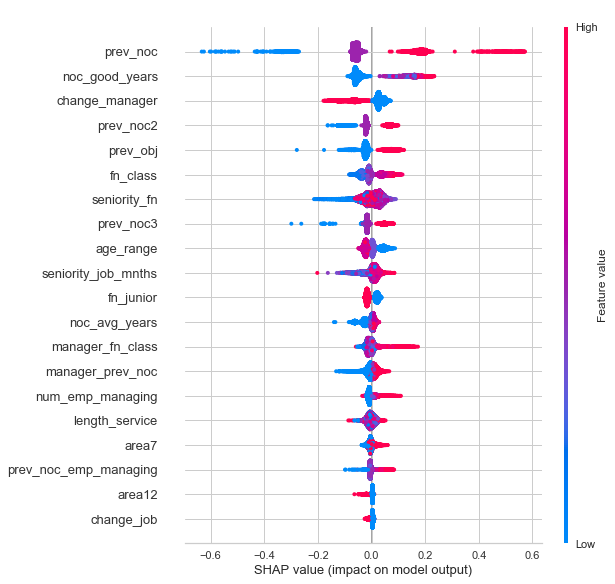

In [51]:
feature_names_list = select_features_noc()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test('noc', feature_names_list[1])

X_shap = pd.DataFrame(X_train, columns=feature_names_list[1])
shap_values = shap.TreeExplainer(test_results_noc[1][3][0]).shap_values(X_shap)

shap.summary_plot(shap_values, X_shap)

## 2. Predicting Promotion 

In [52]:
def train_test_promotion(feature_names):
    data = df.dropna(subset=feature_names)
    data = data.dropna(subset=['next_change_fn_class'])

    X = data[feature_names].values
    y = data['next_change_fn_class'].values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    dtrain = xgboost.DMatrix(X_train, label=(y_train), feature_names=feature_names)
    dval = xgboost.DMatrix(X_val, label=(y_val), feature_names=feature_names)
    dtest = xgboost.DMatrix(X_test, label=(y_test), feature_names=feature_names)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest

In [56]:
def select_features_promotion():
    feature_names_general = ['obj', 'noc', 'age_range', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_job_mnths', 'white_collar', 
                     'change_manager', 'change_job', 'change_fn_area', 'change_bus_supp', 
                     'obj_bad_years', 'obj_avg_years', 'obj_good_years', 'noc_bad_years', 'noc_avg_years', 'noc_good_years',
                     'is_manager', 'num_emp_managing', 'manager_fn_class', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']


    feature_names_all = ['obj', 'noc', 'age_range', 'fn_class', 'business', 'support', 'unknown', 
                     'area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19',  
                     'length_service', 'seniority_fn', 'seniority_job_mnths', 
                     'white_collar', 'fn_junior', 'fn_middle', 'fn_senior', 
                     'change_manager', 'change_job', 'change_fn_class', 'change_fn_area', 'change_bus_supp', 
                     'obj_bad_years', 'obj_avg_years', 'obj_good_years', 'noc_bad_years', 'noc_avg_years', 'noc_good_years', 
                     'is_manager', 'num_emp_managing', 'prev_obj_emp_managing', 'prev_noc_emp_managing',
                     'manager_fn_class', 'manager_prev_obj', 'manager_prev_noc', 
                     'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe', 'num_emp', 
                     'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']

    feature_names_list = []
    feature_names_list.append(feature_names_general)
    feature_names_list.append(feature_names_all)
    return feature_names_list

In [ ]:
feature_names_list = select_features_promotion()

test_results_promotion = []

for i, feature_names in enumerate(feature_names_list):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test_promotion(feature_names)    
    
    test_results = []
    params = [None, 3, 100, 0.05, None]
    
    for j, (model, param) in enumerate(zip(models, params)):
        test_result = models[j]('test', param)
        test_results.append(test_result)

        
    test_results_promotion.append(test_results)

In [58]:
for i, (feature_names, f) in enumerate(zip(feature_names_list, ['feature_names_general:', 'feature_names_all:'])):
    X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test_promotion(feature_names)
    print(f)
    print('The test accuracy score for Regression is: ' + str(accuracy_score(y_test, test_results_promotion[i][0][1])))
    print('The test accuracy score for Decision Tree is: ' + str(accuracy_score(y_test, test_results_promotion[i][1][1])))
    print('The test accuracy score for Random Forest is: ' + str(accuracy_score(y_test, test_results_promotion[i][2][1])))
    print('The test accuracy score for XGBoost is: ' + str(accuracy_score(y_test, test_results_promotion[i][3][1])))
    print('The test accuracy score for Neural Network is: ' + str(accuracy_score(y_test, test_results_promotion[i][4][1])))
    print('')

feature_names_general:
The test accuracy score for Regression is: 0.9062871876239588
The test accuracy score for Decision Tree is: 0.9062871876239588
The test accuracy score for Random Forest is: 0.9062871876239588
The test accuracy score for XGBoost is: 0.9062871876239588
The test accuracy score for Neural Network is: 0.9065846886156287

feature_names_all:
The test accuracy score for Regression is: 0.8909583873629612
The test accuracy score for Decision Tree is: 0.8909583873629612
The test accuracy score for Random Forest is: 0.8909583873629612
The test accuracy score for XGBoost is: 0.892137215607686
The test accuracy score for Neural Network is: 0.8891901449958741



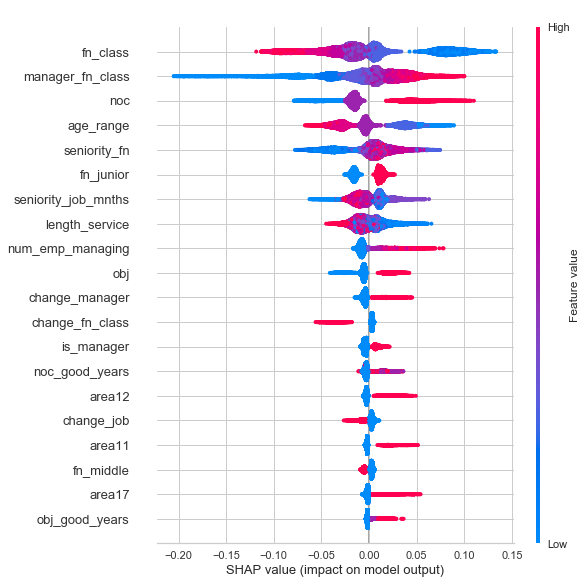

In [61]:
feature_names_list = select_features_promotion()

X_train, X_val, X_test, y_train, y_val, y_test, dtrain, dval, dtest = train_test_promotion(feature_names_list[1])

X_shap = pd.DataFrame(X_train, columns=feature_names_list[1])
shap_values = shap.TreeExplainer(test_results_promotion[1][3][0]).shap_values(X_shap)

shap.summary_plot(shap_values, X_shap)

## 3. Clustering Analysis

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [5]:
#We choose the feature subset for the clustering analysis according to insights from our predictive models
feature_names = ['obj', 'noc', 'next_change_fn_class', 'age_range', 'fn_class',
                 'length_service', 'seniority_fn', 'seniority_job_mnths', 'fn_junior', 'fn_middle', 'fn_senior', 
                 'prev_noc', 'prev_obj',
                 'change_manager', 'change_job', 'change_fn_class',
                 'obj_bad_years', 'obj_avg_years', 'obj_good_years', 'noc_bad_years', 'noc_avg_years', 'noc_good_years',
                 'is_manager', 'num_emp_managing']

data = df.dropna(subset=feature_names)[feature_names]

scaler = MinMaxScaler()

#We know that obj and noc score are very important, that's why we multiply them by ten to give them more weights than
    #the other features. The cluster should be able to recognize clusters with distinctive values in obj and noc scores.
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=feature_names)
data_scaled['obj'] = data_scaled['obj']*10
data_scaled['noc'] = data_scaled['noc']*10

#We tried to find a 4 or 5 clusters, but the data is very high dimensional, so a high number of clusters is better to
    #uncover hidden relationships.
kmeans = KMeans(n_clusters=50)
kmeans.fit(data_scaled)

labels = kmeans.labels_
data_labeled = data.copy()
data_labeled['cluster'] = labels

feature_names.extend(['cluster'])

cluster = data_labeled[feature_names].groupby(['cluster']).mean()

count = data_labeled[feature_names].groupby(['cluster']).count()['obj']
cluster['count'] = count
cluster

C:\Python27\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,obj,noc,next_change_fn_class,age_range,fn_class,length_service,seniority_fn,seniority_job_mnths,fn_junior,fn_middle,fn_senior,prev_noc,prev_obj,change_manager,change_job,change_fn_class,obj_bad_years,obj_avg_years,obj_good_years,noc_bad_years,noc_avg_years,noc_good_years,is_manager,num_emp_managing,count
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.969900,4.000000,0.093645,4.528428,19.829431,19.456522,3.764748,3.288873,0.000000,1.000000,0.000000,3.622074,3.265886,0.239130,0.000000,0.016722,0.030100,1.414716,0.423077,0.010033,0.695652,1.148829,0.000000,0.000000,598
1,3.000000,3.000000,0.158854,3.807292,17.169271,12.591146,3.028918,1.432839,1.000000,0.000000,0.000000,3.192708,3.210938,0.380208,1.000000,0.335938,0.026042,1.742188,0.328125,0.049479,1.593750,0.315104,1.000000,1.183500,384
2,3.000000,3.000000,0.000000,3.778192,16.756219,12.151327,3.600252,3.325693,1.000000,0.000000,0.000000,2.969735,3.074212,0.000000,0.000000,0.004561,0.082504,1.163765,0.194444,0.184080,1.101575,0.161277,0.000000,0.000000,2412
3,4.000000,4.000000,0.136508,4.282540,19.752381,16.326984,3.505945,2.100518,0.000000,1.000000,0.000000,3.593651,3.603175,0.666667,0.565079,0.082540,0.012698,0.714286,0.968254,0.015873,0.711111,1.041270,0.000000,0.000000,315
4,4.019934,3.000000,0.026578,4.589701,19.739203,19.325581,3.886874,2.858653,0.000000,0.983389,0.016611,3.139535,3.387043,0.328904,0.265781,0.013289,0.023256,1.109635,0.639535,0.031561,1.702658,0.232558,0.000000,0.000000,602
5,3.000000,1.983264,0.083682,3.527197,16.654812,10.495816,3.171813,1.428630,1.000000,0.000000,0.000000,2.658996,3.020921,0.449791,1.000000,0.205021,0.121339,1.500000,0.209205,0.506276,1.016736,0.133891,0.098326,0.117312,478
6,1.986486,3.000000,0.043919,4.570946,20.439189,19.445946,3.527903,2.499531,0.000000,0.858108,0.141892,3.070946,2.885135,0.307432,0.331081,0.054054,0.266892,1.165541,0.155405,0.125000,1.452703,0.233108,0.486486,0.719188,296
7,1.957265,1.897436,0.008547,4.512821,20.299145,16.239316,3.686912,2.464952,0.000000,0.914530,0.085470,2.829060,2.880342,0.410256,0.410256,0.051282,0.247863,1.376068,0.153846,0.367521,1.128205,0.264957,0.333333,0.527806,117
8,3.000000,3.000000,0.028889,4.953333,20.182222,23.771111,4.222938,3.586628,0.000000,1.000000,0.000000,3.017778,3.040000,0.000000,0.000000,0.013333,0.011111,2.842222,0.068889,0.004444,2.933333,0.037778,1.000000,1.358306,450


In [ ]:
#After getting the clusters, we export it to an excel file and try to find the most interesting clusters out of 50.
    #Please also check out our <Appendix ClusterAnalysis.xlsx>.